# Лабораторная работа №2

# Решение краевых задач. Методы коллокаций, наименьших квадратов и Гелеркина

#### Будем рассматривать дифференциальное уравнение второго порядка:
$y''+p(x)y'+q(x)y = f(x)$
, где
$p(x), q(x), f(x)$ - заданные непрерывные на отрезке $[a,b]$ функции
#### Ищем приближенное решение в виде линейной комбинации функций
$
y_n(x) = \phi_0(x) + a_1*\phi_1(x) + ... + a_n*\phi_n(x)
$
, где 
$\phi_i$ - базисная система, $a_i$ - неизвестные коэффициенты

#### Подставляем приблеженное решение в первое уравнение и получаем невязку:
$\psi(x_1, a_1, ..., a_n) = p(x)y_n''(x) + q(x)y_n'(x) + r(x)y_n(x) - f(x)$

## Задание

Получить численное решение кревой задачи

$$ay''+(1 + bx^2)y=-1, -1 \le x \le 1$$
##### Задание 1:
$$a = 1$$  $$b = 1 $$
##### Задание 2:
$$a = sin(6)$$  $$b = sin(6)$$

## Краевые условия 

$$y(-1)=0$$

$$y(1) = 0$$

Рассматриваем дифференциальные уравнения второго порядка

$$y''(x) + p(x)y'(x) + q(x)y(x) = f(x)$$

В нашем случае имеем 

$$p(x)=0, q(x)=1 + x^2, f(x)=-1, -1 \leq x \leq 1$$

$$p(x)=0, q(x)=\dfrac {1} {sin(6)} + \dfrac {x^2} {tg(6)}, f(x)=\dfrac {-1} {sin(6)}, -1 \leq x \leq 1$$

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import time
from math import sin, tan

k = 6
a = -1
b = 1
points_array = [20, 60, 100]
basis_funcs = 100

i = sp.Symbol('i')
x = sp.Symbol('x')


def q1():
    return 1 + x**2


def q2():
    return 1 / sin(k) + x**2 / tan(k)


def f1():
    return -1


def f2():
    return -1 / sin(k)


def basis():
    return x**i - x**(2 + i)


def basis_second_diff(x, i):
    if i == 0:
        return -2
    elif i == 1:
        return -6 * x
    else:
        return i * (i - 1) * x**(i - 2) - (2 + i) * (i + 1) * x**i 
    
def show_result(result, basis_funcs):
    phi = sp.lambdify(i, basis(), "numpy")
    return sum([result[i] * phi(i) for i in range(basis_funcs)])

In [2]:
phi = sp.lambdify([x, i], basis(), "numpy")
q1_l = sp.lambdify(x, q1(), "numpy")
q2_l = sp.lambdify(x, q2(), "numpy")

### Метод коллокаций

На отрезке [a,b] выбираются точки $$ x_{1},...,x_{m}∈[a,b] (m>=n), $$ 
которые называются точками коллокации. Точки подставляются в невязку, которая равна нулю в подставленных точках. В итоге получаем систему для определения коэффициентов $$ a_{1},...,a_{n}. $$ Обычно $$ m=n. $$ Поэтому мы получаем такую систему: $$ \begin{cases}Ψ(x_{1},a_{1},...,a_{n}) = 0,\\...................\\Ψ(x_{1},a_{1},...,a_{n}) = 0. \end{cases}$$ Решая эту систему, найдём прибилижённое решение $$ y_{n}(x) $$

In [3]:
def colocation_method(phi, q, f, x, n):
    matrix = np.array([
        [
            basis_second_diff(col_point, j) + q(col_point) * phi(col_point, j) for j in range(n)
        ]
        for col_point in x
    ])
    vector = [f()] * n
    result = np.linalg.solve(matrix, vector)
    return result

#### Задание 1

Points: 20 
Time: 0.7715720300 sec.


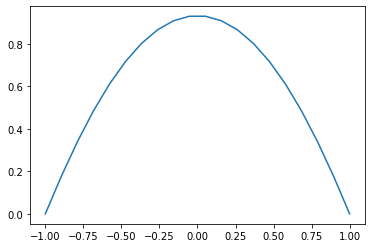

Points: 60 
Time: 0.1867642130 sec.


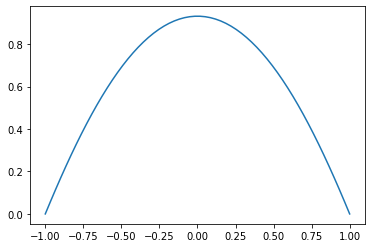

Points: 100 
Time: 0.3456184220 sec.


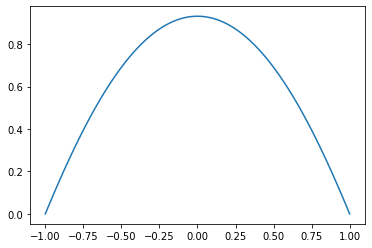

In [4]:
for points_array_element in points_array:
    points = np.linspace(a, b,points_array_element)
    start = time.perf_counter()
    result = colocation_method(phi, q1_l, f1, points,points_array_element)
    res = show_result(result,points_array_element)
    end = time.perf_counter()
    y = [res.subs(x, point) for point in points]
    plt.plot(points, y)
    print("Points: {0} \nTime: {1:1.10f} sec.".format(points_array_element, end-start))
    plt.show()

In [5]:
res.subs(x, 0)

0.932053718340481

#### Задание 2

Points: 20 
Time: 0.0308030270 sec.


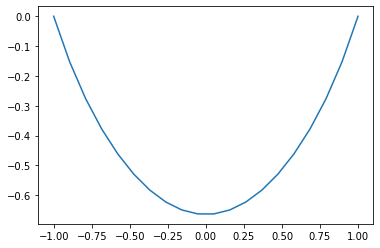

Points: 60 
Time: 0.2014653150 sec.


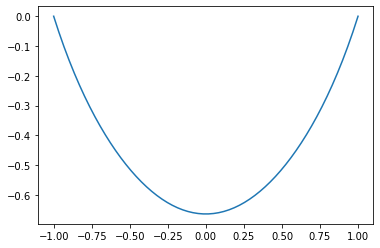

Points: 100 
Time: 0.2510650610 sec.


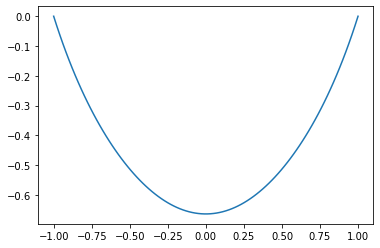

In [6]:
for points_array_element in points_array:
    points = np.linspace(a, b,points_array_element)
    start = time.perf_counter()
    result = colocation_method(phi, q2_l, f2, points,points_array_element)
    res = show_result(result, points_array_element)
    end = time.perf_counter()
    y = [res.subs(x, point) for point in points]
    print("Points: {0} \nTime: {1:1.10f} sec.".format(points_array_element, end-start))
    plt.plot(points, y)
    plt.show()

In [7]:
res.subs(x, 0)

-0.664154282427243

### Метод наименьших квадратов

##### Дискретный МНК
Выбирают N > n точек и решают задачу $$ S = \sum\limits_{i=1}^N Ψ^{2}(x,a_{1},...,a_{n}) ->min. $$ 
Для её решения строится система: 
$$ \begin{cases}{δS\overδa_{1}} = 0,\\........\\{δS\overδa_{n}} = 0. \end{cases}$$

In [8]:
def least_square_method(phi, q, f, x, n):
    a_xj = [[basis_second_diff(j, i) + q(j) * phi(j, i) for j in x] for i in range(n)]
    matrix = []
    for a_i in a_xj:
        dsum_ai = []
        for a_k in a_xj:
            dsum_ai.append(sum(i * k for i, k in zip(a_i, a_k)))
        matrix.append(dsum_ai)
    vector = [f() * sum(a_i) for a_i in a_xj]
    result = np.linalg.solve(matrix, vector)
    return result

#### Задание 1

Points: 20 
Time: 0.2821195560 sec.


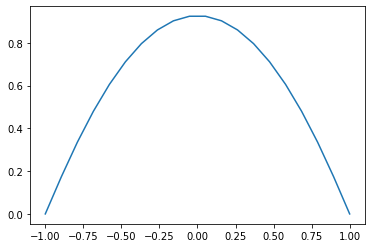

Points: 60 
Time: 0.3598652940 sec.


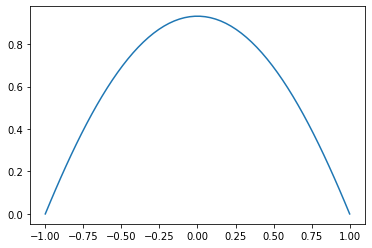

Points: 100 
Time: 0.4370084140 sec.


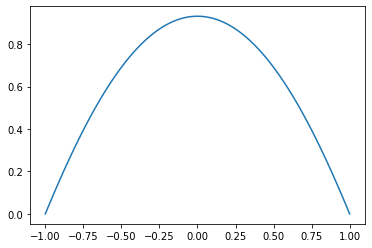

In [9]:
for points_array_element in points_array:
    points = np.linspace(-1, 1,points_array_element)
    start = time.perf_counter()
    result = least_square_method(phi, q1_l, f1, points, basis_funcs)
    res = show_result(result, basis_funcs)
    end = time.perf_counter()
    y = [res.subs(x, point) for point in points]
    print("Points: {0} \nTime: {1:1.10f} sec.".format(points_array_element, end-start))
    plt.plot(points, y)
    plt.show()

In [10]:
res.subs(x, 0)

0.932053751176106

#### Задание 2

Points: 20 
Time: 0.3143834430 sec.


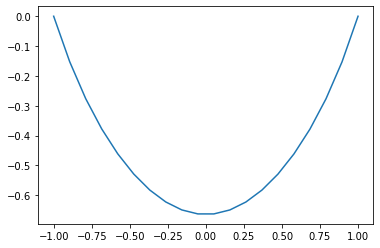

Points: 60 
Time: 0.3481920120 sec.


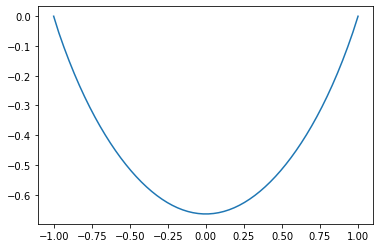

Points: 100 
Time: 0.4766876060 sec.


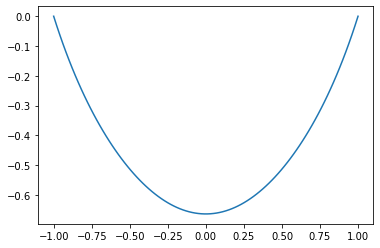

In [11]:
for points_array_element in points_array:
    points = np.linspace(a, b,points_array_element)
    start = time.perf_counter()
    result = least_square_method(phi, q2_l, f2, points, basis_funcs)
    res = show_result(result, basis_funcs)
    end = time.perf_counter()
    y = [res.subs(x, point) for point in points]
    print("Points: {0} \nTime: {1:1.10f} sec.".format(points_array_element, end-start))
    plt.plot(points, y)
    plt.show()

In [12]:
res.subs(x, 0)

-0.664154285273391

### Метод Галеркина

По базисной системе строим прриближеннок решение $$ y_{n}(x) = Ψ_{0}(x)+a_{1}Ψ_{1}(x)+...+a_{n}Ψ_{n}(x)$$
Рассматриваем невязку $$ Ψ(x,a_{1},...a_{n}) $$ и для определения коэффициентов при базисных функциях строим систему 
$$ \begin{cases}\int Ψ(x_{1},a_{1},...,a_{n})φ_{1}(x) \, dx = 0,\\...................\\\int Ψ(x_{n},a_{1},...,a_{n})φ_{n}(x) \, dx = 0. \end{cases}$$ Решая данную систему, находим значение $$ a_{1},...,a_{n}.$$

In [13]:
def galerkin_method(phi, q, f, n):
    x_amount = n * n
    dx = (b - a) / x_amount
    x = np.linspace(a, b, x_amount)
    basis_second_diffs = np.array([
        basis_second_diff(x, i) for i in range(n)
    ])
    qs = q(x)
    phis = np.array([
        phi(x, i) for i in range(n)
    ])
    matrix = np.array([
        np.array([np.trapz(phis[j] * (basis_second_diffs[i] + qs * phis[i]), dx=dx) for i in range(n)])
        for j in range(n)
    ])
    vector = np.array([np.trapz(f() * phis[i], dx=dx) for i in range(n)])
    result = np.linalg.solve(matrix, vector)
    return result

#### Задание 1

Points: 20 
Time: 1.2120039680 sec.


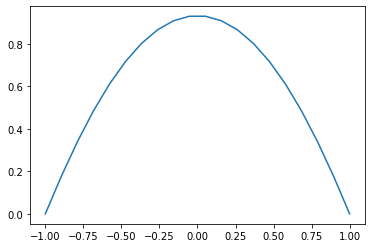

Points: 60 
Time: 0.9353725460 sec.


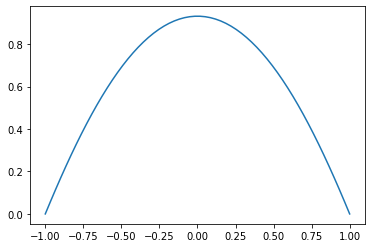

Points: 100 
Time: 0.9476752550 sec.


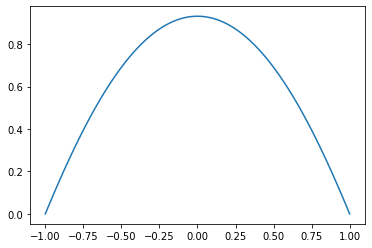

In [14]:
for points_array_element in points_array:
    points = np.linspace(a, b,points_array_element)
    start = time.perf_counter()
    result = galerkin_method(phi, q1_l, f1, basis_funcs)
    res = show_result(result, basis_funcs)
    end = time.perf_counter()
    y = [res.subs(x, point) for point in points]
    print("Points: {0} \nTime: {1:1.10f} sec.".format(points_array_element, end-start))
    plt.plot(points, y)
    plt.show()

In [15]:
res.subs(x, 0)

0.932053718329866

#### Задание 2

Points: 20 
Time: 0.9867495630 sec.


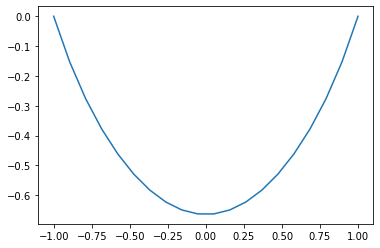

Points: 60 
Time: 0.9471953500 sec.


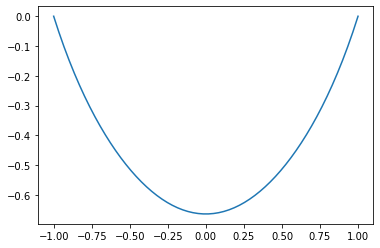

Points: 100 
Time: 0.9410928920 sec.


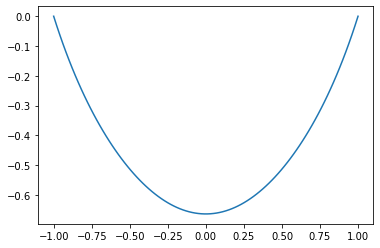

In [16]:
for points_array_element in points_array:
    points = np.linspace(a, b,points_array_element)
    start = time.perf_counter()
    result = galerkin_method(phi, q2_l, f2, basis_funcs)
    res = show_result(result, basis_funcs)
    end = time.perf_counter()
    y = [res.subs(x, point) for point in points]
    print("Points: {0} \nTime: {1:1.10f} sec.".format(points_array_element, end-start))
    plt.plot(points, y)
    plt.show()

In [17]:
res.subs(x, 0)

-0.664154282468643